In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np
import matrix_dev
import matplotlib.pyplot as plt
import _pickle
import gensim
import gensim.corpora as corpora
import os
from pprint import pprint
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from lda_implementation import lda_model

In [3]:
lda = lda_model()

/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dt

In [4]:
lda.load_data('raw_docs', 'dev')

loading pickles


/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [5]:
#lda.lda_mallet_model()
best_model, coherence_values = lda.best_model_search()


Num_topics =  70  corresponding coherence value:  0.5242973120097093
Num_topics =  100  corresponding coherence value:  0.5604104049617923
Num_topics =  130  corresponding coherence value:  0.5905285579042083
Num_topics =  160  corresponding coherence value:  0.6177628906268371
Num_topics =  190  corresponding coherence value:  0.6364521022811573
representative docs
topic distribution


In [6]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, lda.corpus, lda.id2word)

In [1]:
vis

NameError: name 'vis' is not defined

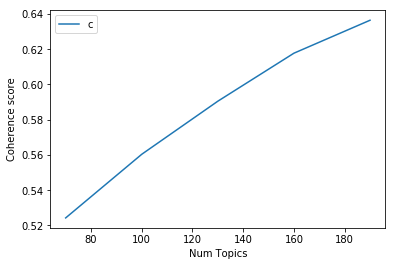

In [8]:
start=70
limit=200
step=30
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()